In [40]:
%matplotlib inline

import pyfar as pf
import sofar as sf
import numpy as np
import warnings

from IPython.display import Audio, display
from pyfar.io import read_sofa


<Axes3D: xlabel='x in m', ylabel='y in m', zlabel='z in m'>

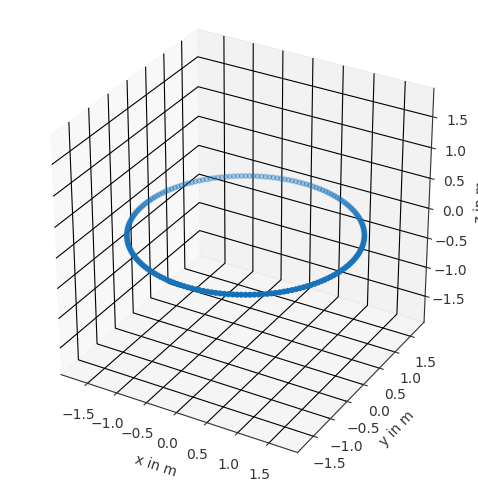

In [2]:
# Load the example HRIR dataset from the FABIAN dummy head 
hrirs, sources = pf.signals.files.head_related_impulse_responses(position="horizontal", diffuse_field_compensation=True)
sources.show()

In [80]:
# HRTF from IHTA HRTF dataset 
# https://www.akustik.rwth-aachen.de/cms/institut-fuer-hoertechnik-und-akustik/forschung/~lsly/hrtf-datenbank/
sofa_path = "HRTF-Database/Examples/MRT25.sofa"
sofa_file = sf.read_sofa(sofa_path)
sofa_file.inspect()
hrirs_ihta = sofa_file.Data_IR

sofa_ihta = sf.read_sofa(sofa_path)          # or whichever file
fs_ihta   = float(sofa_ihta.Data_SamplingRate)        # 44 100 Hz for IHTA :contentReference[oaicite:0]{index=0}
hrir_ihta = pf.Signal(sofa_ihta.Data_IR, fs_ihta)     # (M, R, N) + fs


SOFA file contained custom entries
----------------------------------
GLOBAL_RoomDescription
SimpleFreeFieldHRIR 1.0 (SOFA version 1.0)
-------------------------------------------
GLOBAL_Conventions : SOFA
GLOBAL_Version : 1.0
GLOBAL_SOFAConventions : SimpleFreeFieldHRIR
GLOBAL_SOFAConventionsVersion : 1.0
GLOBAL_APIName : ARI SOFA API for Matlab/Octave
GLOBAL_APIVersion : 1.0.2
GLOBAL_ApplicationName : ITA-Toolbox
GLOBAL_ApplicationVersion : 7
GLOBAL_AuthorContact : rbo (@akustik.rwth-aachen.de)
GLOBAL_Comment : 
GLOBAL_DataType : FIR
GLOBAL_History : R. Bomhardt, M. de la Fuente Klein, and J. Fels: A high-resolution head-related transfer function and three-dimensional ear model database, Proceedings of Meetings on Acoustics 29, 050002 (2016)
GLOBAL_License : Creative Commons Attribution-NonCommercial-ShareAlike 4.0 (CC BY-NC-SA 4.0)
GLOBAL_Organization : Institute of Technical Acoustics, RWTH Aachen University
GLOBAL_References : R. Bomhardt, M. de la Fuente Klein, and J. Fels: A hig

<Axes: xlabel='Time in s', ylabel='Amplitude'>

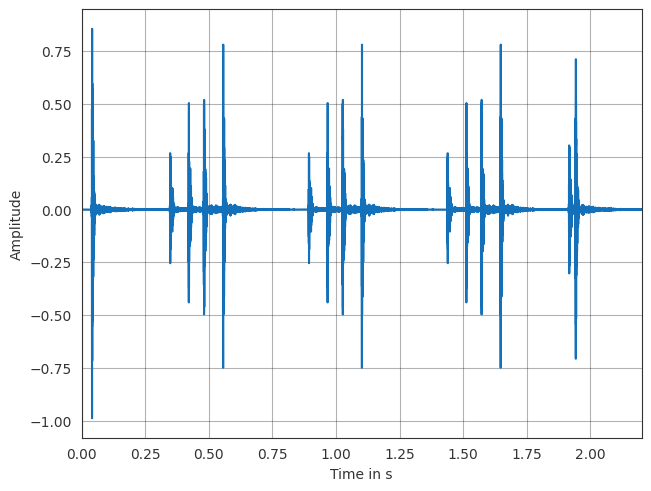

In [81]:
castanets = pf.signals.files.castanets()

pf.plot.time(castanets)

In [82]:
# define the direction of the desired sound source; here, we choose the
# right direction
elevation = 0
azimuth = -np.pi*2/8
radius = 100

step = np.pi / 8
for azimuth in np.arange(-np.pi, np.pi + step, step): 
    #print('Binaural audio from Fabian dummy head:')
    #BinauralAudioFromHRIR(elevation, azimuth, radius, hrirs)
    print('Binaural audio from IHTA HRTF database:')
    BinauralAudioFromHRIR(elevation, azimuth, radius, hrir_ihta)


Binaural audio from IHTA HRTF database:


Binaural audio from IHTA HRTF database:


Binaural audio from IHTA HRTF database:


Binaural audio from IHTA HRTF database:


Binaural audio from IHTA HRTF database:


Binaural audio from IHTA HRTF database:


Binaural audio from IHTA HRTF database:


Binaural audio from IHTA HRTF database:


Binaural audio from IHTA HRTF database:


Binaural audio from IHTA HRTF database:


Binaural audio from IHTA HRTF database:


Binaural audio from IHTA HRTF database:


Binaural audio from IHTA HRTF database:


Binaural audio from IHTA HRTF database:


Binaural audio from IHTA HRTF database:


Binaural audio from IHTA HRTF database:


Binaural audio from IHTA HRTF database:


In [ ]:
# Compare conventional stereo rendering with amplitude panning and the stereo audio convolving with HRIR

# Set stereo_weights for panning weights
stereo_weights = [0,1] # Right ear channel only

# Generate a stereo version by amplitude panning
stereo_audio = castanets * stereo_weights
player_spanning = Audio(stereo_audio.time, rate=stereo_audio.sampling_rate)
display("Stereo spanning audio:")
display(player_spanning)



'Stereo spanning audio:'

In [76]:
def BinauralAudioFromHRIR(elevation, azimuth, radius, hrirs):
    
    desired_direction = pf.Coordinates.from_spherical_elevation(
        azimuth, elevation, radius
    )

    index, _ = sources.find_nearest(desired_direction)

    #sources.show(index)

    # find the desired source position
    desired_direction = pf.Coordinates.from_spherical_elevation(
        azimuth, elevation, radius)
    index, _ = sources.find_nearest(desired_direction)


    # Generate binaural version by convolution with the HRIRs
    binaural_audio = pf.dsp.convolve(castanets, hrirs[index])

    # render the binaural audio
    player_binaural = Audio(binaural_audio.time, rate=binaural_audio.sampling_rate)
    display(player_binaural)

    return